In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cm
from salishsea_tools import viz_tools

### Imports

In [24]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]
mmask = 1 - tmask
area = ((1-tmask) * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})[0]
max_depth = bathy.Bathymetry.rename({'y':'gridY', 'x':'gridX'})
mean_depth = np.nanmean(max_depth.to_numpy())

volume = ((1-tmask) * mesh.e3t_0[0] * mesh.e1t[0] * mesh.e2t[0]).rename({'z':'depth', 'y':'gridY', 'x':'gridX'})

In [4]:
# dimensions: gridY, gridX, time
sum_2023 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2023, 2023))
sum_2022 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2022, 2022))
sum_2021 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2021, 2021))
sum_2020 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2020, 2020))
sum_2019 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol_e3t_depsum_vol.nc'.format(2019, 2019))

In [5]:
# dimensions: gridY, gridX, time
vol_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2023, 2023))
vol_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2022, 2022))
vol_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2021, 2021))
vol_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020))
vol_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_res1M_{}0101_{}1231_e3t_3d_vol.nc'.format(2019, 2019))

In [103]:
# dimensions: gridY, gridX, time
vol_2023 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol.nc'.format(2023, 2023))
vol_2022 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol.nc'.format(2022, 2022))
vol_2021 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol.nc'.format(2021, 2021))
vol_2020 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol.nc'.format(2020, 2020))
vol_2019 = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/transformations/3d_hindcast_vol/SalishSeaCast_river_trace_day_avg_allR_00_40_{}0101_{}1231_e3t_3d_vol.nc'.format(2019, 2019))

In [26]:
phys_2023_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2023, 2023))
phys_2022_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2022, 2022))
phys_2021_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2021, 2021))
phys_2020_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2020, 2020))
phys_2019_mon = xr.open_dataset('/ocean/cdonaldson/research_runs/hindcast_auto/extractions/SalishSeaCast_river_trace_day_avg_allP_00_40_res1M_{}0101_{}1231.nc'.format(2019, 2019))

In [6]:
tablist_nogrey = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']
rainbow_bright = ['#D20000', '#FF7C00', '#FFB600', '#6DCA13', '#44C3D0', '#283BD0', '#B62AD4']
rainbow_muted = ['#7D0404', '#AB5503', '#396B09', '#277780', '#151E67', '#561265']
colors_list8 = rainbow_bright + rainbow_muted

### Functions

In [7]:
def plot_box(ax, corn, colour):
    ax.plot([corn[2], corn[3], corn[3], corn[2], corn[2]], 
            [corn[0], corn[0], corn[1], corn[1], corn[0]], '-', color=colour)

In [8]:
def make_1d(ds, reg_list):
    all_1d = ds.isel(gridY=slice(reg_list[0][0], reg_list[0][1]), gridX=slice(reg_list[0][2], reg_list[0][3])).sum(dim='gridY').sum(dim='gridX')
    for region in reg_list[1:]:
        next = ds.isel(gridY=slice(region[0], region[1]), gridX=slice(region[2], region[3])).sum(dim='gridY').sum(dim='gridX')
        all_1d = all_1d + next

    return all_1d

In [9]:
def make_m_and_prop(regions, river):
    total_area = make_1d(area, regions)

    dim1_2019 = make_1d(sum_2019, regions)  # dim1 is the sum of all the water in the given regions. is 1d in time for each river
    dim1_2020 = make_1d(sum_2020, regions)
    dim1_2021 = make_1d(sum_2021, regions)
    dim1_2022 = make_1d(sum_2022, regions)
    dim1_2023 = make_1d(sum_2023, regions)
    dim1_all = xr.concat([dim1_2019, dim1_2020, dim1_2021, dim1_2022, dim1_2023], dim='time')

    meters1_all = dim1_all[river] / total_area

    totals_all = dim1_all.to_array().sum(dim="variable")
    prop_all = dim1_all[river] / totals_all

    return meters1_all, prop_all

### Daily M of FW Timeseries 2019-2023

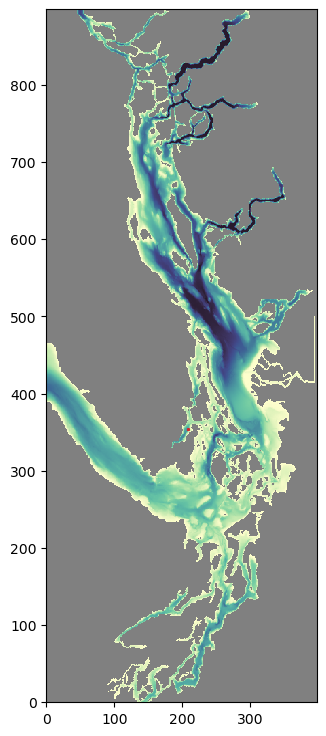

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
mycmap = cm.deep
mycmap.set_bad('grey')
ax.pcolormesh(bathy['Bathymetry'], cmap=mycmap)
viz_tools.set_aspect(ax);

Pat_Bay = [[353, 353+1, 209, 209+1]]
plot_box(ax, Pat_Bay[0], 'tab:red')

In [11]:
## Run once then comment out
# meters_fraser, prop_fraser = make_m_and_prop(Pat_Bay, 'fraser_river')
# meters_nooksack, prop_nooksack = make_m_and_prop(Pat_Bay, 'nooksack_river')
# meters_skagit, prop_skagit = make_m_and_prop(Pat_Bay, 'skagit_river')
# meters_snohomish, prop_snohomish = make_m_and_prop(Pat_Bay, 'snohomish_river')
# meters_nisqually, prop_nisqually = make_m_and_prop(Pat_Bay, 'nisqually_river')
# meters_elwha, prop_elwha = make_m_and_prop(Pat_Bay, 'elwha_river')
# meters_cowichan, prop_cowichan = make_m_and_prop(Pat_Bay, 'cowichan_river')
# meters_nanaimo, prop_nanaimo = make_m_and_prop(Pat_Bay, 'nanaimo_river')
# meters_puntledge, prop_puntledge = make_m_and_prop(Pat_Bay, 'puntledge_river')
# meters_salmon, prop_salmon = make_m_and_prop(Pat_Bay, 'salmon_river')
# meters_homathko, prop_homathko = make_m_and_prop(Pat_Bay, 'homathko_river')
# meters_squamish, prop_squamish = make_m_and_prop(Pat_Bay, 'squamish_river')
# meters_other, prop_other = make_m_and_prop(Pat_Bay, 'other_rivers')

In [12]:
## Run once then comment out
# meters_ds_patbay = xr.Dataset({
#     'nooksack_river': meters_nooksack,
#     'skagit_river': meters_skagit,
#     'snohomish_river': meters_snohomish,
#     'nisqually_river': meters_nisqually,
#     'elwha_river': meters_elwha,
#     'cowichan_river': meters_cowichan,
#     'nanaimo_river': meters_nanaimo,
#     'puntledge_river': meters_puntledge,
#     'salmon_river': meters_salmon,
#     'homathko_river': meters_homathko,
#     'squamish_river': meters_squamish,
#     'fraser_river': meters_fraser,
#     'other_rivers': meters_other
# })

# prop_ds_patbay = xr.Dataset({
#     'nooksack_river': prop_nooksack,
#     'skagit_river': prop_skagit,
#     'snohomish_river': prop_snohomish,
#     'nisqually_river': prop_nisqually,
#     'elwha_river': prop_elwha,
#     'cowichan_river': prop_cowichan,
#     'nanaimo_river': prop_nanaimo,
#     'puntledge_river': prop_puntledge,
#     'salmon_river': prop_salmon,
#     'homathko_river': prop_homathko,
#     'squamish_river': prop_squamish,
#     'fraser_river': prop_fraser,
#     'other_rivers': prop_other
# })

# meters_ds_patbay.to_netcdf('patbay_daily_m_freshwater.nc')
# prop_ds_patbay.to_netcdf('patbay_daily_prop_freshwater.nc')

In [13]:
meters_ds = xr.open_dataset('fraser_daily_m_freshwater.nc')
prop_ds = xr.open_dataset('fraser_daily_prop_freshwater.nc')

In [14]:
meters_ds_patbay = xr.open_dataset('patbay_daily_m_freshwater.nc')
prop_ds_patbay = xr.open_dataset('patbay_daily_prop_freshwater.nc')

In [15]:
regions_list = list(meters_ds.keys())
regions_list

['PS', 'MR', 'JdFE', 'JdFW', 'FRP', 'SoGN', 'SoGS', 'SoGC', 'SaS']

In [16]:
rivers_list = list(meters_ds_patbay.keys())
rivers_list

['nooksack_river',
 'skagit_river',
 'snohomish_river',
 'nisqually_river',
 'elwha_river',
 'cowichan_river',
 'nanaimo_river',
 'puntledge_river',
 'salmon_river',
 'homathko_river',
 'squamish_river',
 'fraser_river',
 'other_rivers']

Text(0.5, 1.0, 'Average Meters of Fraser River Freshwater in Each Region')

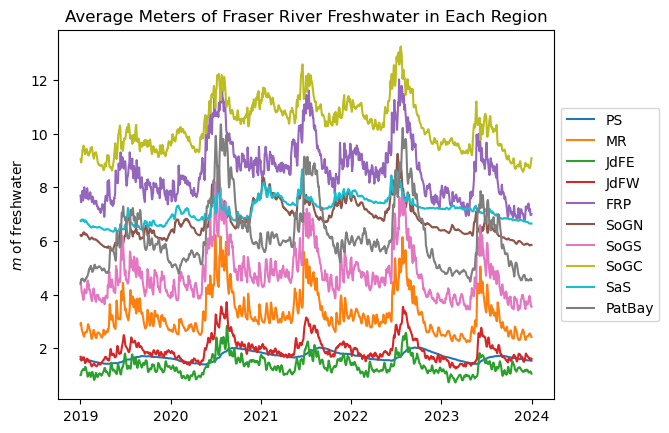

In [17]:
for idx in np.arange(len(regions_list)):
    region = regions_list[idx]
    plt.plot(meters_ds['time'], meters_ds[region], label=region, c=tablist_nogrey[idx])
plt.plot(meters_ds['time'], meters_ds_patbay['fraser_river'], label='PatBay', c='tab:grey')
plt.ylabel(r'$m$ of freshwater')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average Meters of Fraser River Freshwater in Each Region')

Text(0.5, 1.0, 'Average Meters of Freshwater in From Each River in Patricia Bay')

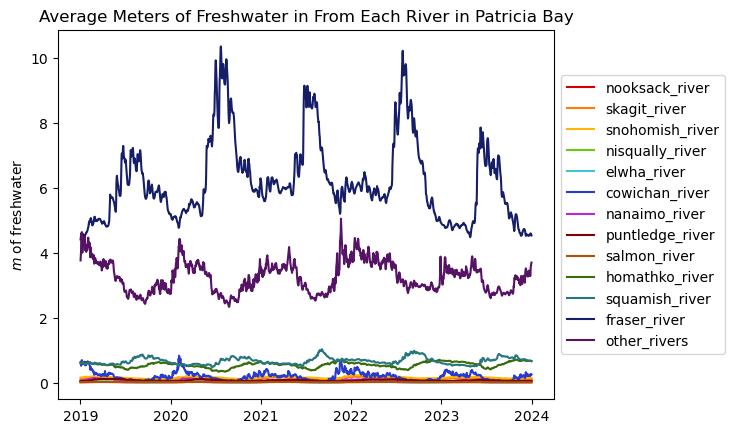

In [18]:
for idx in np.arange(len(rivers_list)):
    river = rivers_list[idx]
    plt.plot(meters_ds_patbay['time'], meters_ds_patbay[river], label=river, c=colors_list8[idx])
plt.ylabel(r'$m$ of freshwater')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average Meters of Freshwater in From Each River in Patricia Bay')

### Monthly FW Concentration Plots 2019-2023

In [19]:
Pat_Bay_vol_all_mon = xr.concat([vol_2019_mon.isel(gridY=353, gridX=209), vol_2020_mon.isel(gridY=353, gridX=209), vol_2021_mon.isel(gridY=353, gridX=209), vol_2022_mon.isel(gridY=353, gridX=209), vol_2023_mon.isel(gridY=353, gridX=209)], dim='time')

In [27]:
Pat_Bay_phys_all_mon = xr.concat([phys_2019_mon.isel(gridY=353, gridX=209), phys_2020_mon.isel(gridY=353, gridX=209), phys_2021_mon.isel(gridY=353, gridX=209), phys_2022_mon.isel(gridY=353, gridX=209), phys_2023_mon.isel(gridY=353, gridX=209)], dim='time')

In [20]:
Pat_Bay_vol = volume.isel(gridY=353, gridX=209)

(0.0, 130.0)

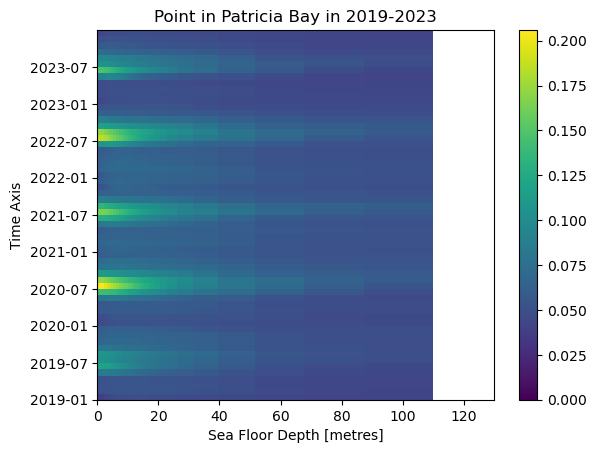

In [23]:
(Pat_Bay_vol_all_mon['fraser_river']/Pat_Bay_vol).plot(vmin=0)
plt.title('Point in Patricia Bay in 2019-2023')
plt.xlim(0,130)

Text(0.5, 1.0, 'Patricia Bay [jj, ii = (353, 209)] Fraser River Concentration')

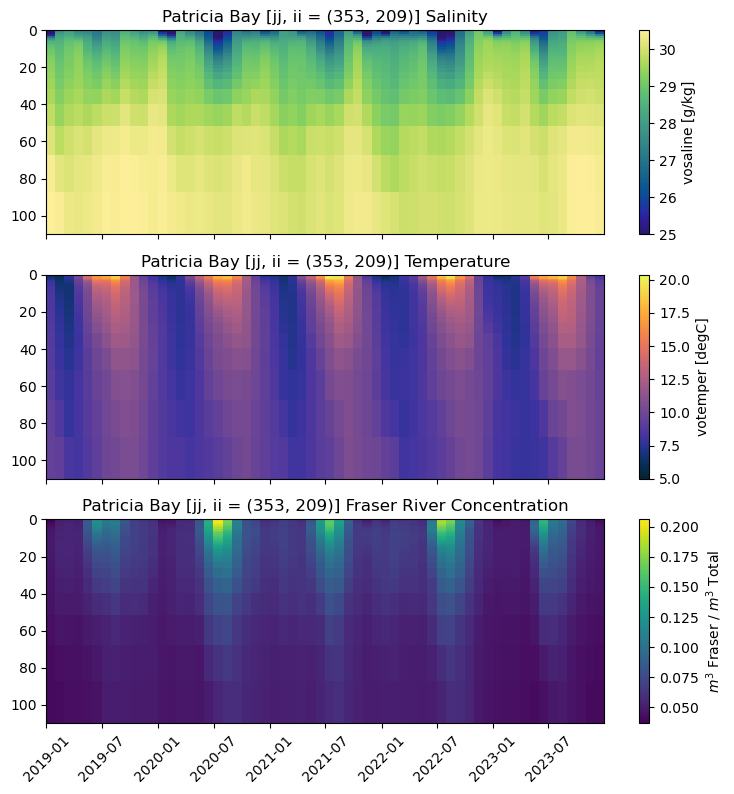

In [56]:
fig, ax = plt.subplots(3, 1, figsize=(9, 9), sharex=True)
colormesh1 = ax[0].pcolormesh(Pat_Bay_phys_all_mon['time'], Pat_Bay_phys_all_mon['depth'], Pat_Bay_phys_all_mon['vosaline'].T, cmap=cm.haline, vmin=25)
ax[0].set_ylim([110, 0])
cb1 = fig.colorbar(colormesh1, ax=ax[0], label='vosaline [g/kg]')
# cont1 = ax[0].contour(Pat_Bay_phys_all_mon['time'], Pat_Bay_phys_all_mon['depth'], Pat_Bay_phys_all_mon['vosaline'].T, [29.5], colors='black')
# cb1.add_lines(cont1)
ax[0].set_title('Patricia Bay [jj, ii = (353, 209)] Salinity')

colormesh2 = ax[1].pcolormesh(Pat_Bay_phys_all_mon['time'], Pat_Bay_phys_all_mon['depth'], Pat_Bay_phys_all_mon['votemper'].T, cmap=cm.thermal, vmin=5)
ax[1].set_ylim([110, 0])
cb2 = fig.colorbar(colormesh2, ax=ax[1], label='votemper [degC]')
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title('Patricia Bay [jj, ii = (353, 209)] Temperature')

colormesh3 = ax[2].pcolormesh(Pat_Bay_vol_all_mon['time'], Pat_Bay_vol_all_mon['depth'], (Pat_Bay_vol_all_mon['fraser_river']/Pat_Bay_vol).T, cmap='viridis')
ax[2].set_ylim([110, 0])
cb2 = fig.colorbar(colormesh3, ax=ax[2], label=r'$m^3$ Fraser / $m^3$ Total')
ax[2].tick_params(axis='x', labelrotation=45)
ax[2].set_title('Patricia Bay [jj, ii = (353, 209)] Fraser River Concentration')

### River Flow Timeseries Method 1 As Monthly

$F_{Fraser} = dV/dt$

here, dt = one month and dV = difference between previous day current day

In [93]:
dt = 30.5 * 24 * 60 * 60  # about how many seconds are in a month
dt

2635200.0

In [94]:
PatBay_fraser_vol = Pat_Bay_vol_all_mon['fraser_river'].sum(dim='depth')
holder = PatBay_fraser_vol.to_numpy()
PatBay_fraser_vol_shift = np.concatenate([holder[-1:], holder[:-1]])  # note that this wraps around

In [97]:
monthly_dV = PatBay_fraser_vol - PatBay_fraser_vol_shift
secondly_dV = monthly_dV/dt

Text(0.5, 1.0, 'Fraser Flow: $m^3 / second$')

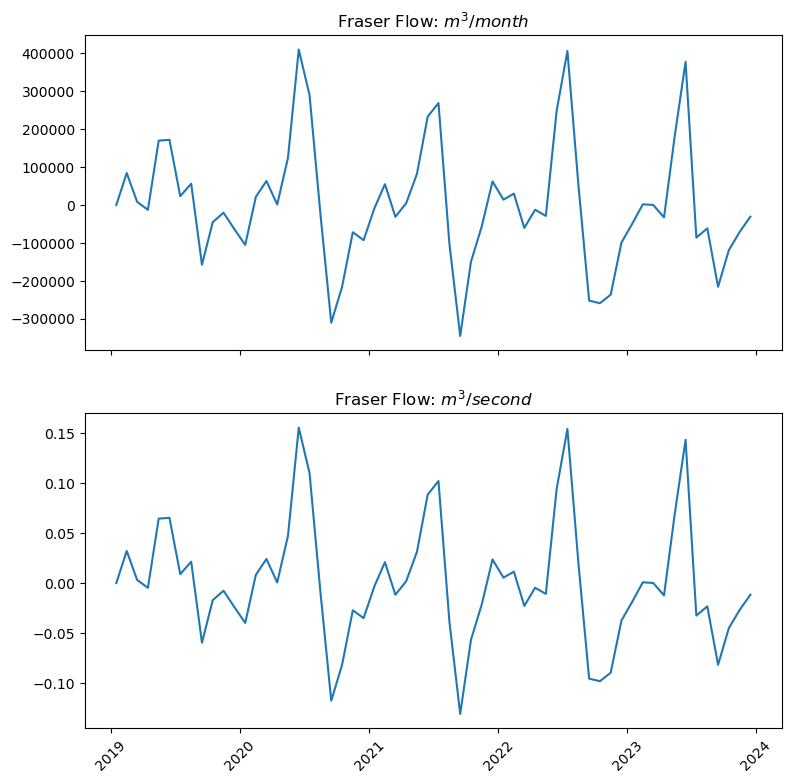

In [102]:
fig, ax = plt.subplots(2, 1, figsize=(9, 9), sharex=True)

ax[0].plot(PatBay_fraser_vol['time'], monthly_dV)
ax[0].set_title('Fraser Flow: $m^3 / month$')

ax[1].plot(PatBay_fraser_vol['time'], secondly_dV)
ax[1].tick_params(axis='x', labelrotation=45)
ax[1].set_title('Fraser Flow: $m^3 / second$')

### River Flow Timeseries Method 2 as Daily

In [112]:
Pat_Bay_vol_fraser_2019 = sum_2019['fraser_river'].isel(gridY=353, gridX=209)
Pat_Bay_vol_fraser_2020 = sum_2020['fraser_river'].isel(gridY=353, gridX=209)
Pat_Bay_vol_fraser_2021 = sum_2021['fraser_river'].isel(gridY=353, gridX=209)
Pat_Bay_vol_fraser_2022 = sum_2022['fraser_river'].isel(gridY=353, gridX=209)
Pat_Bay_vol_fraser_2023 = sum_2023['fraser_river'].isel(gridY=353, gridX=209)

Pat_Bay_vol_fraser_all = xr.concat([Pat_Bay_vol_fraser_2019, Pat_Bay_vol_fraser_2020, Pat_Bay_vol_fraser_2021, Pat_Bay_vol_fraser_2022, Pat_Bay_vol_fraser_2023], dim='time')

Text(0, 0.5, 'fraser river m3')

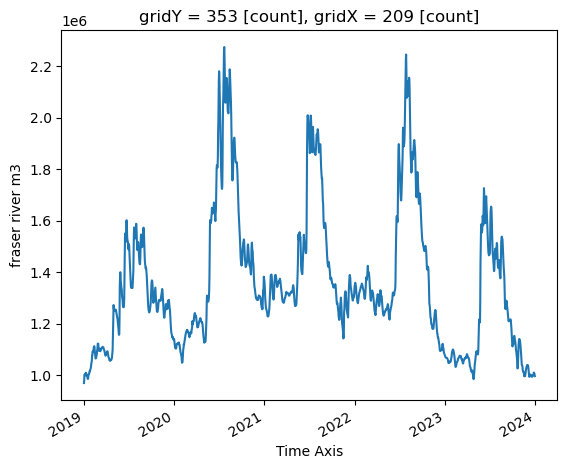

In [116]:
Pat_Bay_vol_fraser_all.plot()
plt.ylabel('fraser river m3')

In [117]:
Pat_Bay_vol_fraser_all
holder = Pat_Bay_vol_fraser_all.to_numpy()
PatBay_fraser_vol_shift = np.concatenate([holder[-1:], holder[:-1]])  # note that this wraps around

In [120]:
seconds_in_day = 86400

In [121]:
Pat_Bay_daily_fraser_flow = ((Pat_Bay_vol_fraser_all + PatBay_fraser_vol_shift)/2)/seconds_in_day

Text(0, 0.5, 'm3/s')

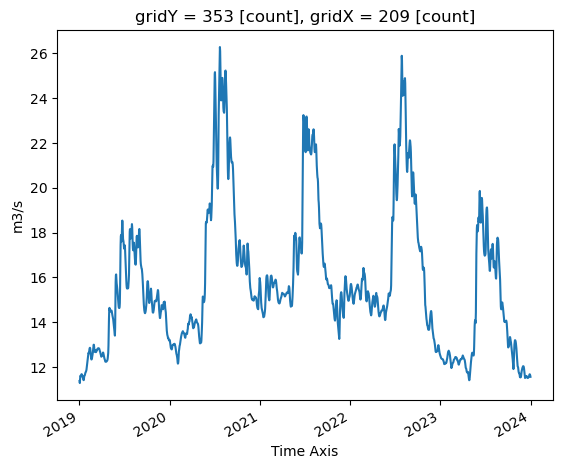

In [126]:
Pat_Bay_daily_fraser_flow.plot()
plt.ylabel('m3/s')

Text(0, 0.5, 'm3')

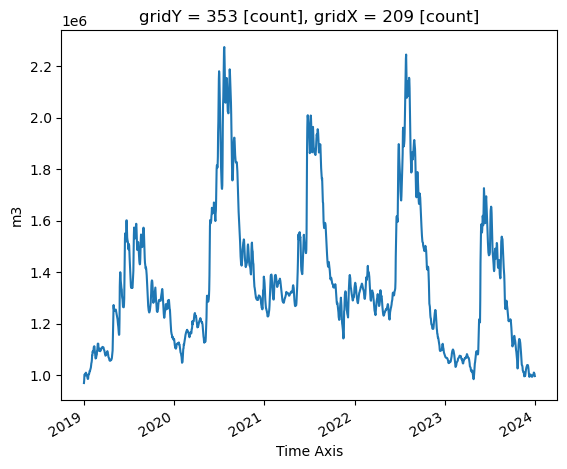

In [127]:
Pat_Bay_vol_fraser_all.plot()
plt.ylabel('m3')